## Time Series Analysis Models - ARIMA

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pmdarima.arima import auto_arima

In [2]:
data = yf.Ticker('GOOG')
data = data.history(period= 'max')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-25 00:00:00-04:00,125.209999,125.980003,122.900002,124.349998,33812700,0.0,0.0
2023-05-26 00:00:00-04:00,124.065002,126.000000,123.290001,125.430000,25154700,0.0,0.0
2023-05-30 00:00:00-04:00,126.290001,126.379997,122.889999,124.639999,27230700,0.0,0.0


In [3]:
df = data.copy()

In [4]:
df['Last Day Closing Price'] = df['Close'].shift(1)
df['Closing Change'] = df['Close'] - df['Last Day Closing Price']

df.drop(['Dividends', 'Stock Splits', 'Last Day Closing Price'], axis= 1, inplace= True)
df

,Open,High,Low,Close,Volume,Closing Change
Date,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,NaN
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.198506
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.027148
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,-0.112827
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.028144
...,...,...,...,...,...,...
2023-05-25 00:00:00-04:00,125.209999,125.980003,122.900002,124.349998,33812700,2.709999
2023-05-26 00:00:00-04:00,124.065002,126.000000,123.290001,125.430000,25154700,1.080002
2023-05-30 00:00:00-04:00,126.290001,126.379997,122.889999,124.639999,27230700,-0.790001


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Closing Change
count,4729.000000,4729.000000,4729.000000,4729.000000,4.729000e+03,4728.000000
mean,39.046180,39.459447,38.645999,39.060815,1.215536e+08,0.025776
std,36.140827,36.557562,35.759187,36.164187,1.524285e+08,1.003469
min,2.470490,2.534002,2.390042,2.490913,1.584340e+05,-10.110001
25%,12.698403,12.836884,12.558926,12.693671,2.937800e+07,-0.170552
50%,26.035519,26.232500,25.733349,25.960226,6.569332e+07,0.012952
75%,55.347500,56.094501,54.820000,55.331501,1.507750e+08,0.231124
max,151.863495,152.100006,149.887497,150.709000,1.650833e+09,10.158005


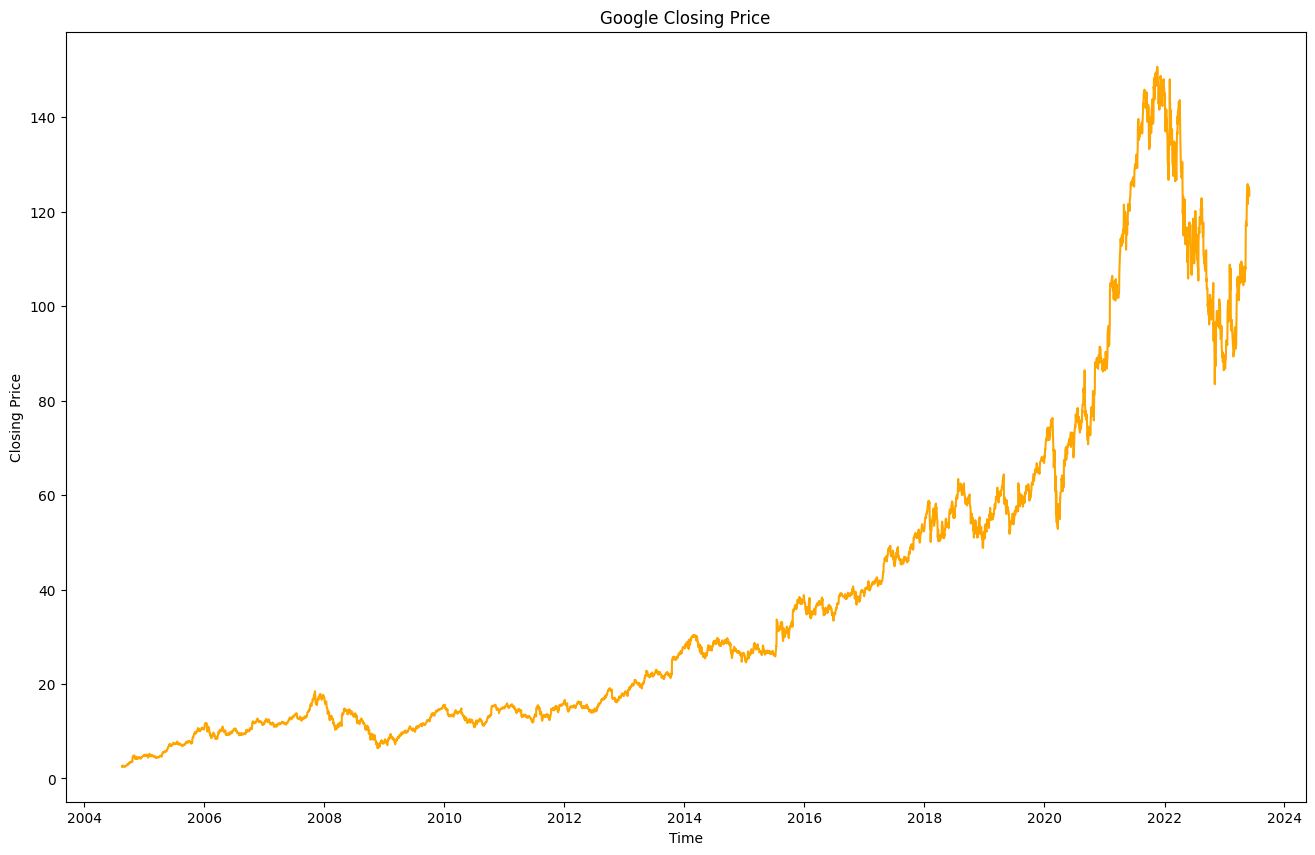

In [6]:
plt.figure(figsize= (16,10))
plt.title('Google Closing Price')
plt.plot(data['Close'], color= 'orange', label= 'Closing Price')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

We can see that the closing price of Google has witnessed a greater increase after 2015 as compared to the preceding years. Thus, I'm selecting the data from 2015 to put in the model.

In [7]:
# Find the earliest dates that the Google stock market opens in 2015
df = df.reset_index()
df[df['Date'].dt.strftime('%Y').str.contains('2015')]

,Date,Open,High,Low,Close,Volume,Closing Change
2611,2015-01-02 00:00:00-05:00,26.378078,26.490770,26.133251,26.168653,28951268,-0.079283
2612,2015-01-05 00:00:00-05:00,26.091366,26.144720,25.582764,25.623152,41196796,-0.545502
2613,2015-01-06 00:00:00-05:00,25.679497,25.738087,24.983908,25.029282,57998800,-0.593870
2614,2015-01-07 00:00:00-05:00,25.280592,25.292759,24.914099,24.986401,41301082,-0.042881
2615,2015-01-08 00:00:00-05:00,24.831326,25.105074,24.482782,25.065184,67071641,0.078783
...,...,...,...,...,...,...,...
2858,2015-12-24 00:00:00-05:00,37.477501,37.567501,37.331001,37.419998,10544000,-0.095501
2859,2015-12-28 00:00:00-05:00,37.646000,38.149502,37.476002,38.125500,30306000,0.705502
2860,2015-12-29 00:00:00-05:00,38.334499,38.999001,38.321499,38.830002,35300000,0.704502
2861,2015-12-30 00:00:00-05:00,38.830002,38.880001,38.345001,38.549999,25866000,-0.280003


In [8]:
# Select df from 2015 until the most recent one
df = df.loc[2611:]
df

,Date,Open,High,Low,Close,Volume,Closing Change
2611,2015-01-02 00:00:00-05:00,26.378078,26.490770,26.133251,26.168653,28951268,-0.079283
2612,2015-01-05 00:00:00-05:00,26.091366,26.144720,25.582764,25.623152,41196796,-0.545502
2613,2015-01-06 00:00:00-05:00,25.679497,25.738087,24.983908,25.029282,57998800,-0.593870
2614,2015-01-07 00:00:00-05:00,25.280592,25.292759,24.914099,24.986401,41301082,-0.042881
2615,2015-01-08 00:00:00-05:00,24.831326,25.105074,24.482782,25.065184,67071641,0.078783
...,...,...,...,...,...,...,...
4724,2023-05-25 00:00:00-04:00,125.209999,125.980003,122.900002,124.349998,33812700,2.709999
4725,2023-05-26 00:00:00-04:00,124.065002,126.000000,123.290001,125.430000,25154700,1.080002
4726,2023-05-30 00:00:00-04:00,126.290001,126.379997,122.889999,124.639999,27230700,-0.790001
4727,2023-05-31 00:00:00-04:00,123.699997,124.900002,123.099998,123.370003,41548800,-1.269997


In [9]:
# Create a function checking the stationarity of the data
def stationarity_check(station_data):
    # Calculate rolling mean and standard deviation
    roll_mean = station_data.rolling(30, center= True, closed= 'both').mean()
    roll_std = station_data.rolling(10, center= True, closed= 'both').std()
    
    # Plot data, rolling mean and standard deviation
    fig = plt.figure(figsize= (16,10))
    plt.subplot(211)
    plt.plot(station_data, color= 'green', label= 'Original Data')
    plt.plot(roll_mean, color= 'black', label= 'Rolling Mean (30 days)')
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std, color= 'orange', label= 'Rolling Std (10 days)')
    plt.legend()
    plt.show()
    
    # Perform Augmented Dickey-Fuller test
    result = adfuller(station_data.dropna(), autolag= 'AIC')
    print('Dickey-Fuller test results\n')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for cv, r in result[4].items():
        print('\t%s: %.3f' % (cv, r))

### ARIMA for Closing Price

In [10]:
# Extract necessary data
close = df['Close']

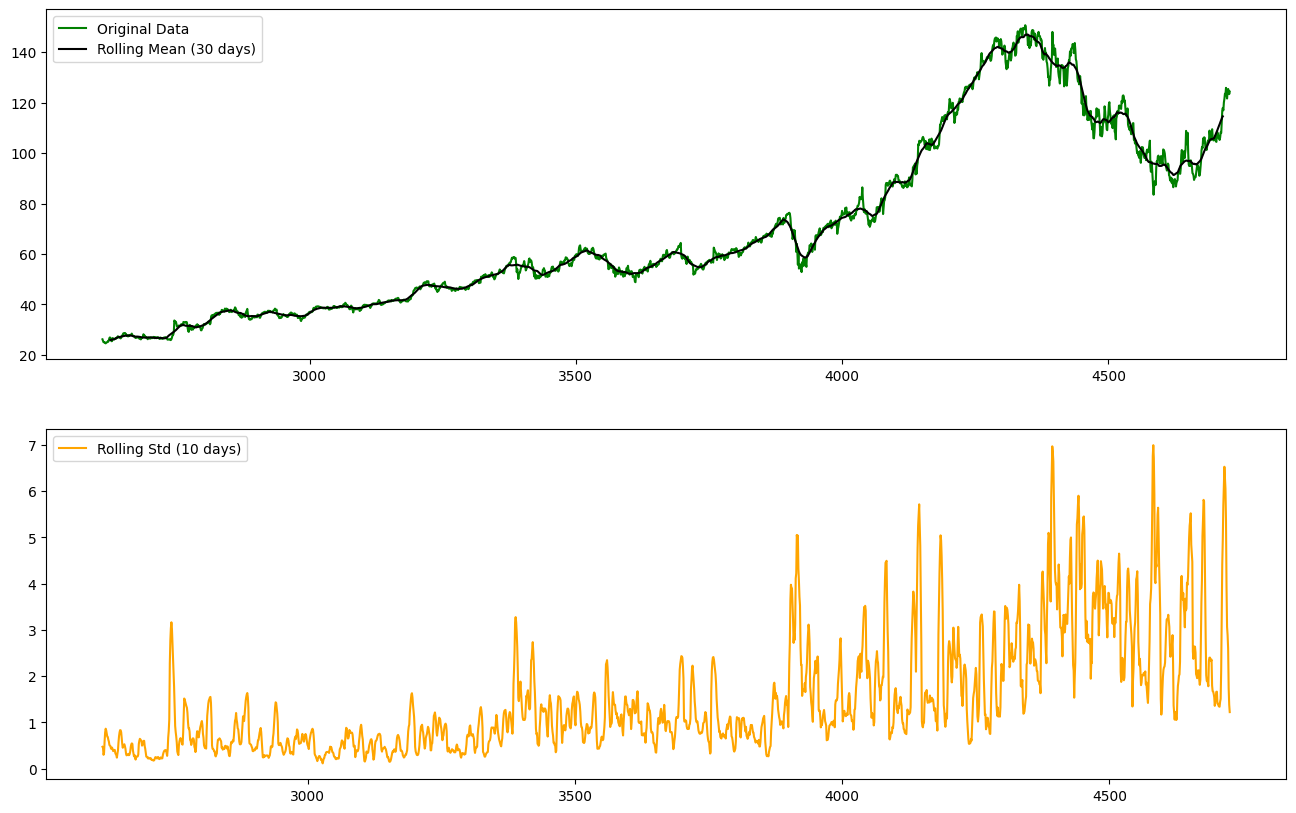

Dickey-Fuller test results

ADF Statistic: -0.4990930748555117
p-value: 0.8921933554818278
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


In [11]:
stationarity_check(close)

Original data is not stationary, let's try differencing it.

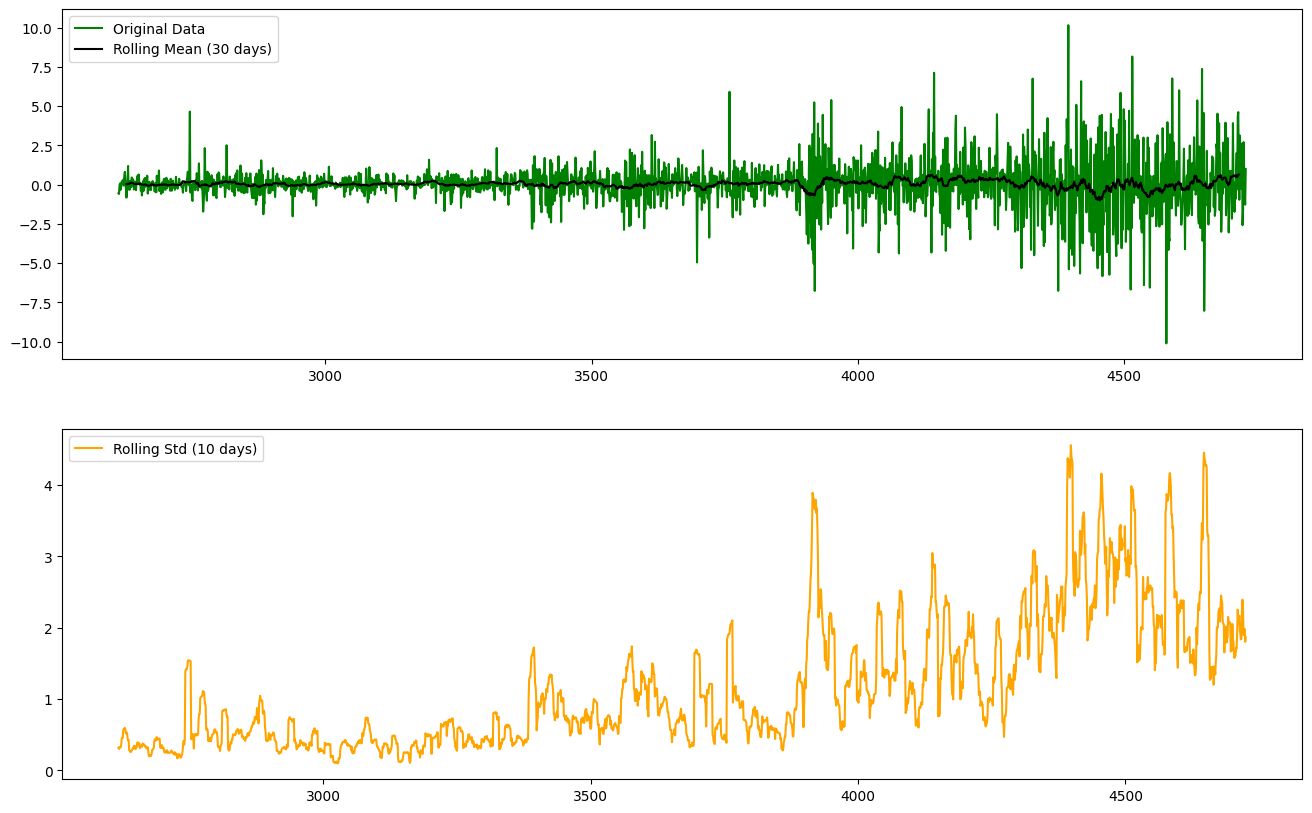

Dickey-Fuller test results

ADF Statistic: -11.015097891339705
p-value: 6.185216971560818e-20
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


In [12]:
close_diff = close.diff().dropna()
stationarity_check(close_diff)

Differencing by 1 shows the data is stationary, d = 1. With d = 1, let's begin ACF and PACF plot to find the optimal q and p parameter, respectively.

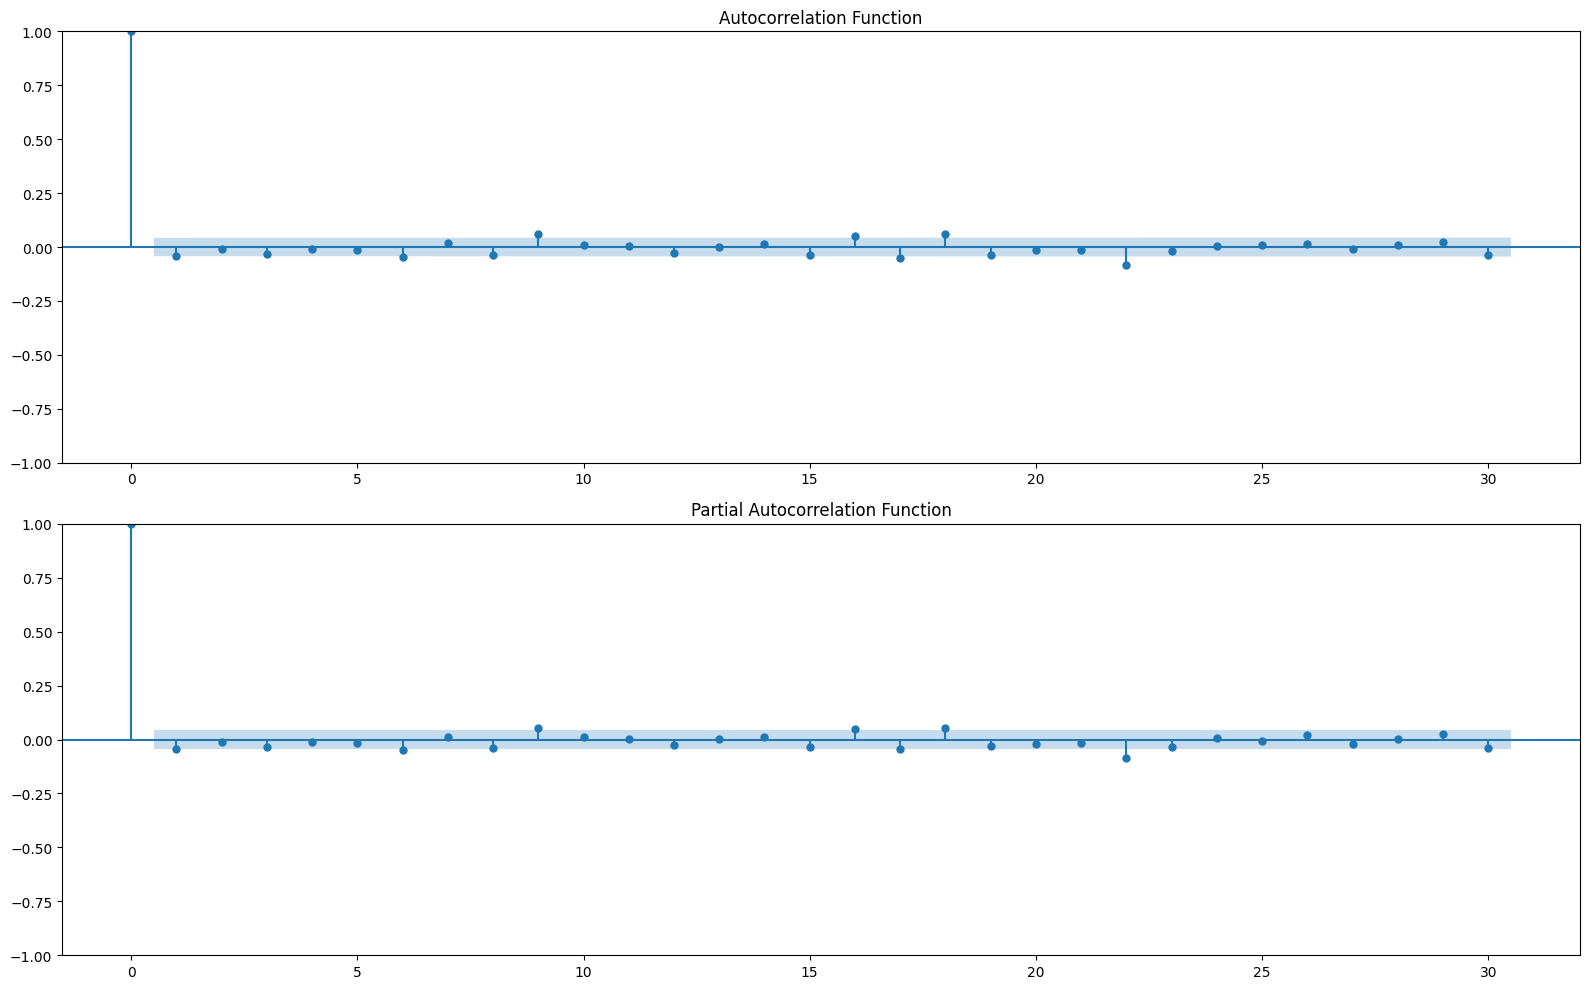

In [13]:
# Plot ACF and PACF functions
fig, ax = plt.subplots(2, figsize= (16, 10))
plot_acf(close_diff, ax= ax[0], lags= 30)
ax[0].set(title='Autocorrelation Function')
plot_pacf(close_diff, ax= ax[1], lags= 30)
ax[1].set(title= 'Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

ACF and PACF demonstrates the optimal number for q and p is both 1. Hence, we have acquired the order for ARIMA model: (1,1,1). Let's check with auto_arima function.

In [14]:
model = auto_arima(close, seasonal= False, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7647.266, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7645.217, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7645.104, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7647.369, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7643.028, Time=2.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7644.871, Time=1.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7644.881, Time=1.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7646.667, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7646.864, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7643.978, Time=0.39 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 10.498 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2118
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3817.514
Date:                Fri, 02 Jun 2023   AIC                           7643.028
Time:                        14:30:48   BIC                           7665.659
Sample:                             0   HQIC                          7651.314
                               - 2118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0119      0.009      1.333      0.182      -0.006       0.029
ar.L1          0.7440      0.092      8.067      0.000       0.563       0.925
ma.L1         -0.7857      0.086     -9.147      0.000      -0.954      -0.617
sigma2         2.1568      0.032     67.656      0.000       2.094       2.219
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3910.63
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              20.59   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The final order is (1,1,1). Let's begin applying the model.

In [15]:
# Split data into train and test data
train_close, test_close = train_test_split(close, test_size = 0.2, shuffle = False)

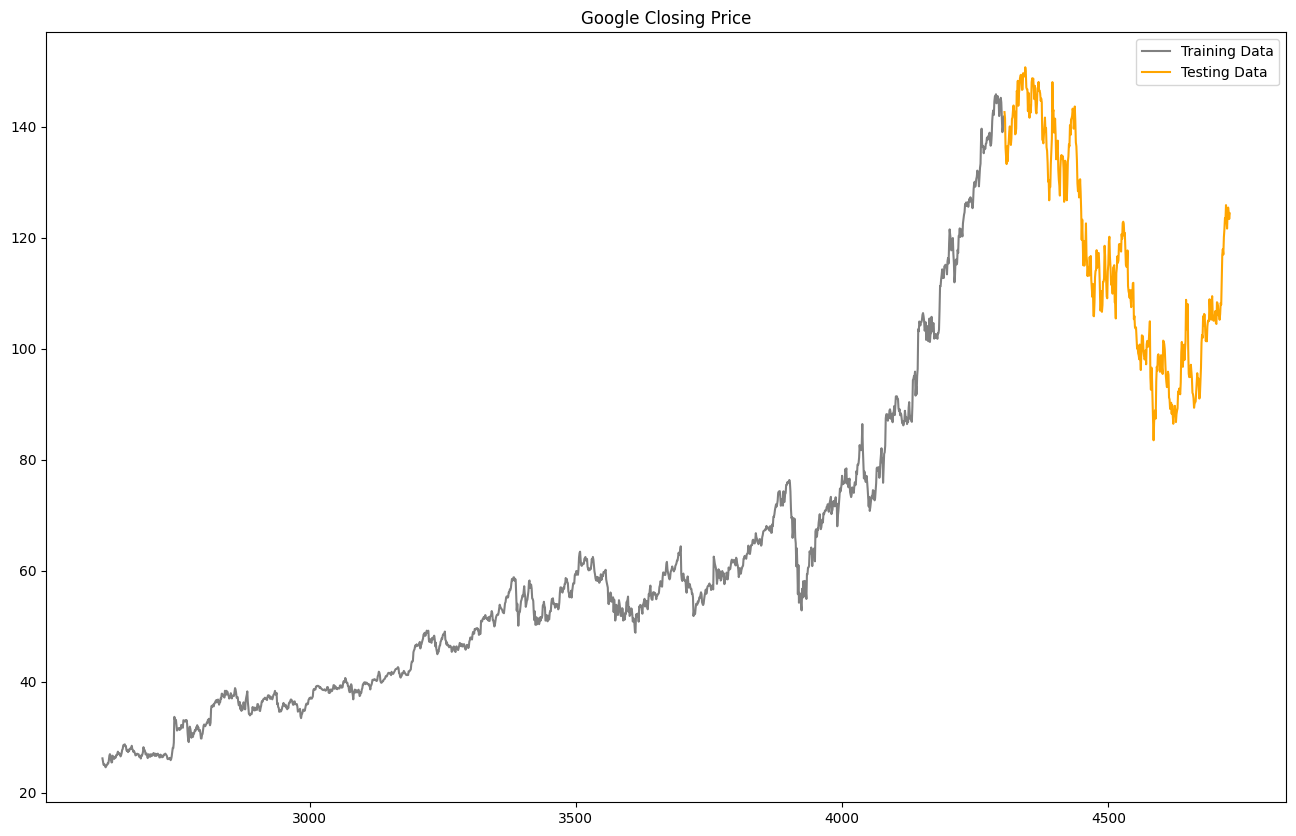

In [16]:
plt.figure(figsize= (16,10))
plt.title('Google Closing Price')
plt.plot(train_close,color= 'grey', label= 'Training Data')
plt.plot(test_close,color= 'orange', label= 'Testing Data')
plt.legend()
plt.show()

In [17]:
warnings.filterwarnings('ignore')

# Define the size of the training window
window_size = 30

# Convert dataframes to arrays
train_close_arr = train_close.values
test_close_arr = test_close.values

# Initialize lists with training data and predictions
history_close = [x for x in train_close_arr]
pred_close = []

# Iterate through test data and make predictions
for t in range(len(test_close_arr)):
    # Fit ARIMA model on the most recent observations
    start = max(0, len(history_close) - window_size)
    end = len(history_close)
    arima_close = ARIMA(history_close[start:end], order=(1, 1, 1))
    model_close = arima_close.fit()

    # Make forecast and update lists
    output_close = model_close.forecast()
    prediction_close = output_close[0]
    pred_close.append(prediction_close)
    obs = test_close_arr[t]
    history_close.append(obs)

# Calculate MSE and R2 score for model
mse_close = mean_squared_error(test_close_arr, pred_close)
rmse_close = sqrt(mse_close)
r2_score_close = r2_score(test_close_arr, pred_close)
print('RMSE of ARIMA model for closing price:', rmse_close, '\nR2 Score of ARIMA model for closing price:', r2_score_close)

RMSE of ARIMA model for closing price: 2.7262322060086137 
R2 Score of ARIMA model for closing price: 0.9787147841368701


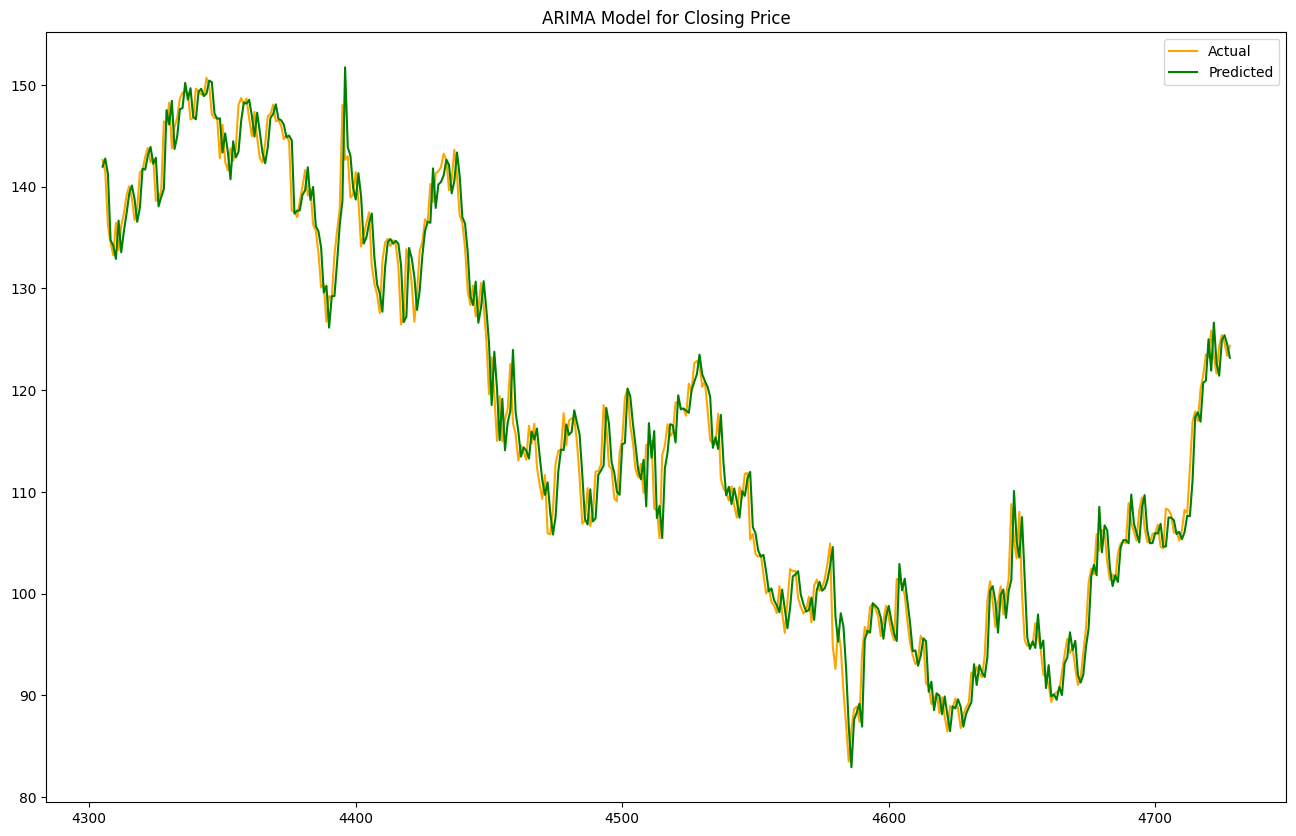

In [18]:
# Plot the prediction and real data
plt.figure(figsize= (16,10))
plt.title('ARIMA Model for Closing Price')
plt.plot(test_close.index, test_close, color= 'orange', label= 'Actual')
plt.plot(test_close.index, pred_close, color= 'green', label= 'Predicted')
plt.legend()
plt.show()

In [19]:
# Compare test data and the prediction
close_data_test = pd.DataFrame({'Closing Price (Test Data)': test_close, 'Closing Price (Prediction on Test Data)': pred_close, 'Difference': np.abs(test_close - pred_close)})
close_data_test

,Closing Price (Test Data),Closing Price (Prediction on Test Data),Difference
4305,142.632996,141.970310,0.662685
4306,141.501007,142.776472,1.275465
4307,136.184006,141.271018,5.087012
4308,134.520996,134.748922,0.227925
4309,133.265503,134.212027,0.946524
...,...,...,...
4724,124.349998,121.431460,2.918538
4725,125.430000,124.910602,0.519398
4726,124.639999,125.406943,0.766944
4727,123.370003,124.503459,1.133456


### ARIMA for Closing Price Change

In [20]:
change = df['Closing Change']

Since the closing price change is calculated by subtracting the current value to the previous value, it is possible that d = 0 and p = q = 1 based on the parameters of the moedl for closing price. Let's check if (1,0,1) is the right order.

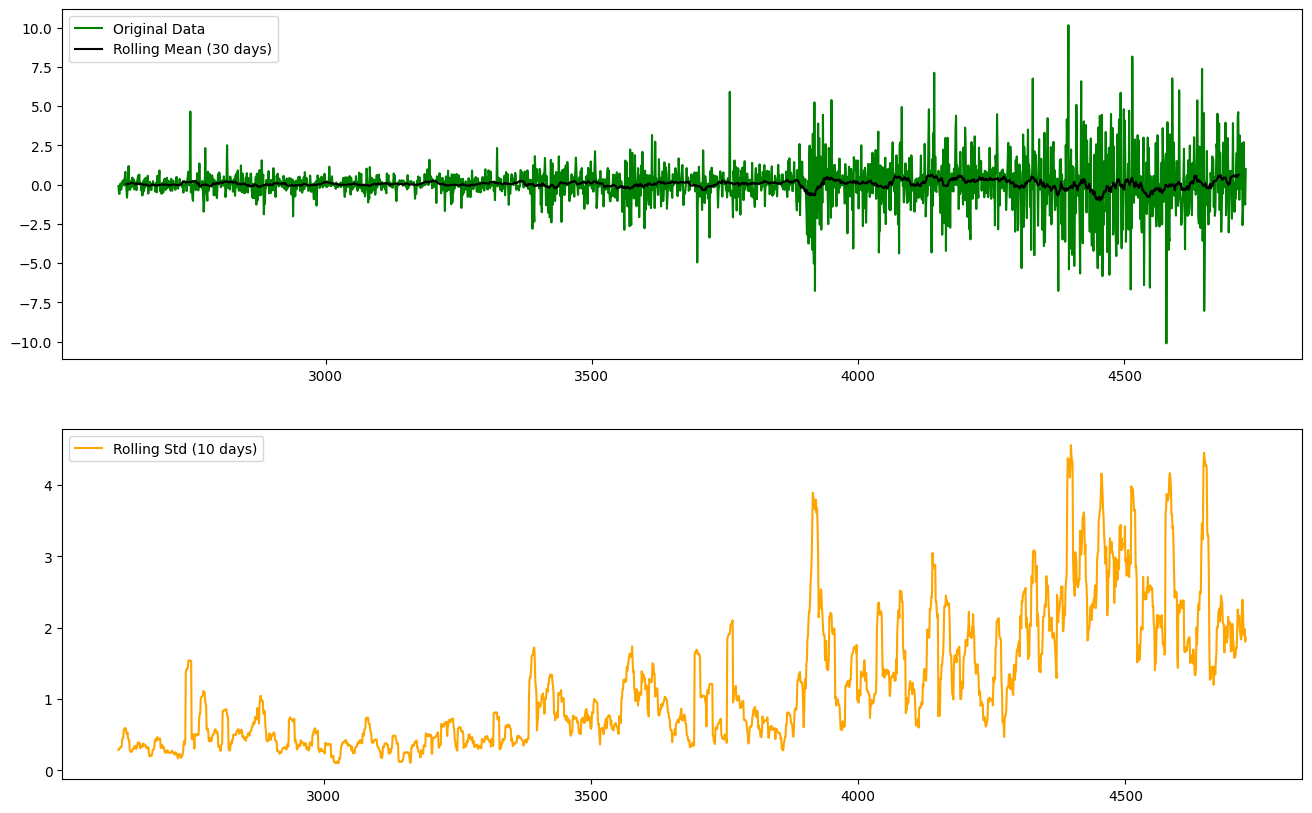

Dickey-Fuller test results

ADF Statistic: -11.018041341094895
p-value: 6.086133799228251e-20
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


In [21]:
stationarity_check(change)

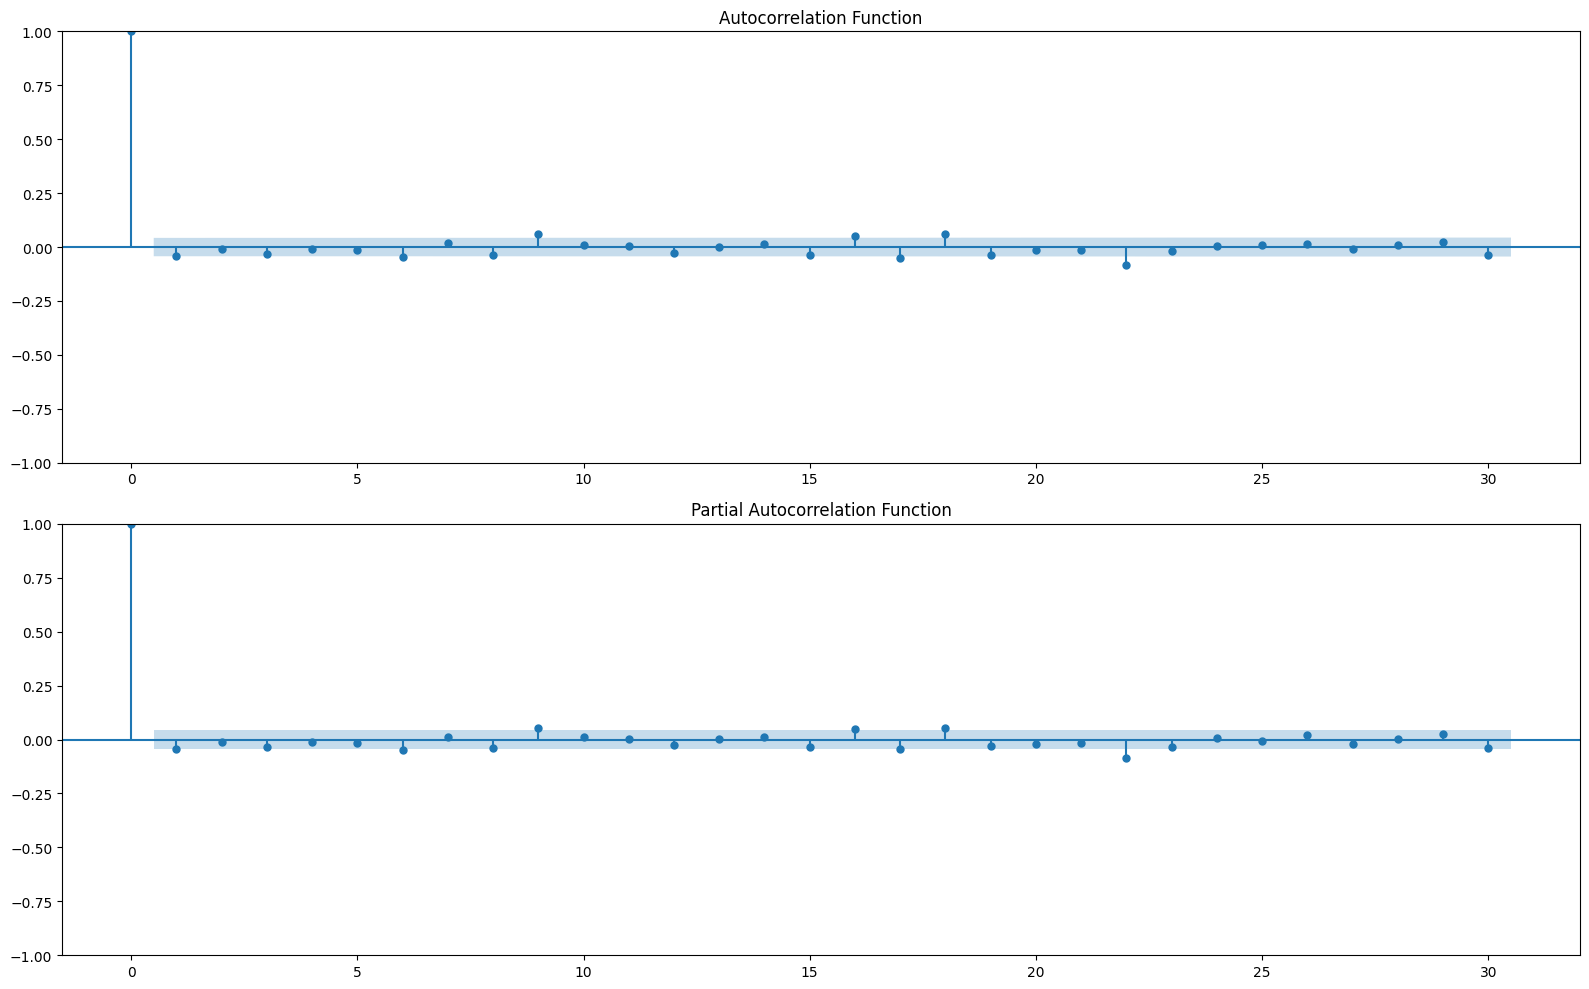

In [22]:
fig, ax = plt.subplots(2, figsize= (16, 10))
plot_acf(change, ax= ax[0], lags= 30)
ax[0].set(title= 'Autocorrelation Function')
plot_pacf(change, ax= ax[1], lags= 30)
ax[1].set(title= 'Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [23]:
auto_arima(change, seasonal= False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7649.983, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7648.123, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7648.025, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7646.592, Time=0.92 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7648.491, Time=0.83 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7648.498, Time=0.74 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=7649.661, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7649.828, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7645.649, Time=2.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7647.723, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7647.836, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7647.491, Time=2.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7647.501, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : 

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

The final order is (1,0,1). Let's begin applying the model.

In [24]:
# Split data into train and test data
train_change, test_change = train_test_split(change, test_size= 0.2, shuffle= False)

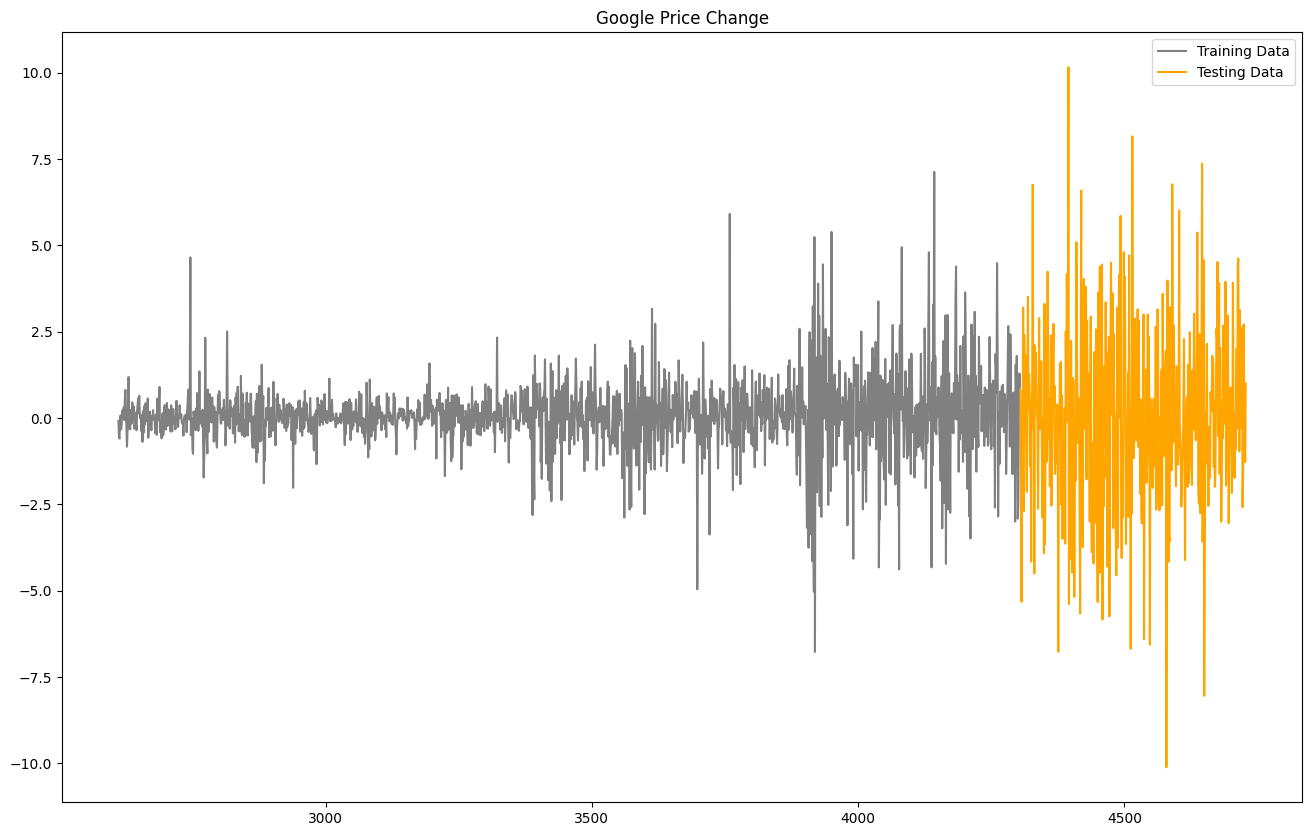

In [25]:
plt.figure(figsize=(16,10))
plt.title('Google Price Change')
plt.plot(train_change,color= 'grey', label='Training Data')
plt.plot(test_change,color= 'orange', label='Testing Data')
plt.legend()
plt.show()

In [26]:
warnings.filterwarnings('ignore')

# Define the size of the training window
window_size = 30

# Convert dataframes to arrays
train_change_arr = train_change.values
test_change_arr = test_change.values

# Initialize lists with training data and predictions
history_change = [x for x in train_change_arr]
pred_change = []

# Iterate through test data and make predictions
for t in range(len(test_change_arr)):
    # Fit ARIMA model on the most recent observations
    start = max(0, len(history_change) - window_size)
    end = len(history_change)
    arima_change = ARIMA(history_change[start:end], order=(1, 1, 1))
    model_change = arima_change.fit()
    
    # Make forecast and update lists
    output_change = model_change.forecast()
    prediction_change = output_change[0]
    pred_change.append(prediction_change)
    obs = test_change_arr[t]
    history_change.append(obs)

# Calculate MSE and R2 score for model
mse_change = mean_squared_error(test_change_arr, pred_change)
rmse_change = sqrt(mse_change)
r2_score_change = r2_score(test_change_arr, pred_change)
print('RMSE of ARIMA model for price change:', rmse_change, '\nR2 Score of ARIMA model for price change:', r2_score_change)

RMSE of ARIMA model for price change: 2.7983411674236276 
R2 Score of ARIMA model for price change: -0.18204806788379813


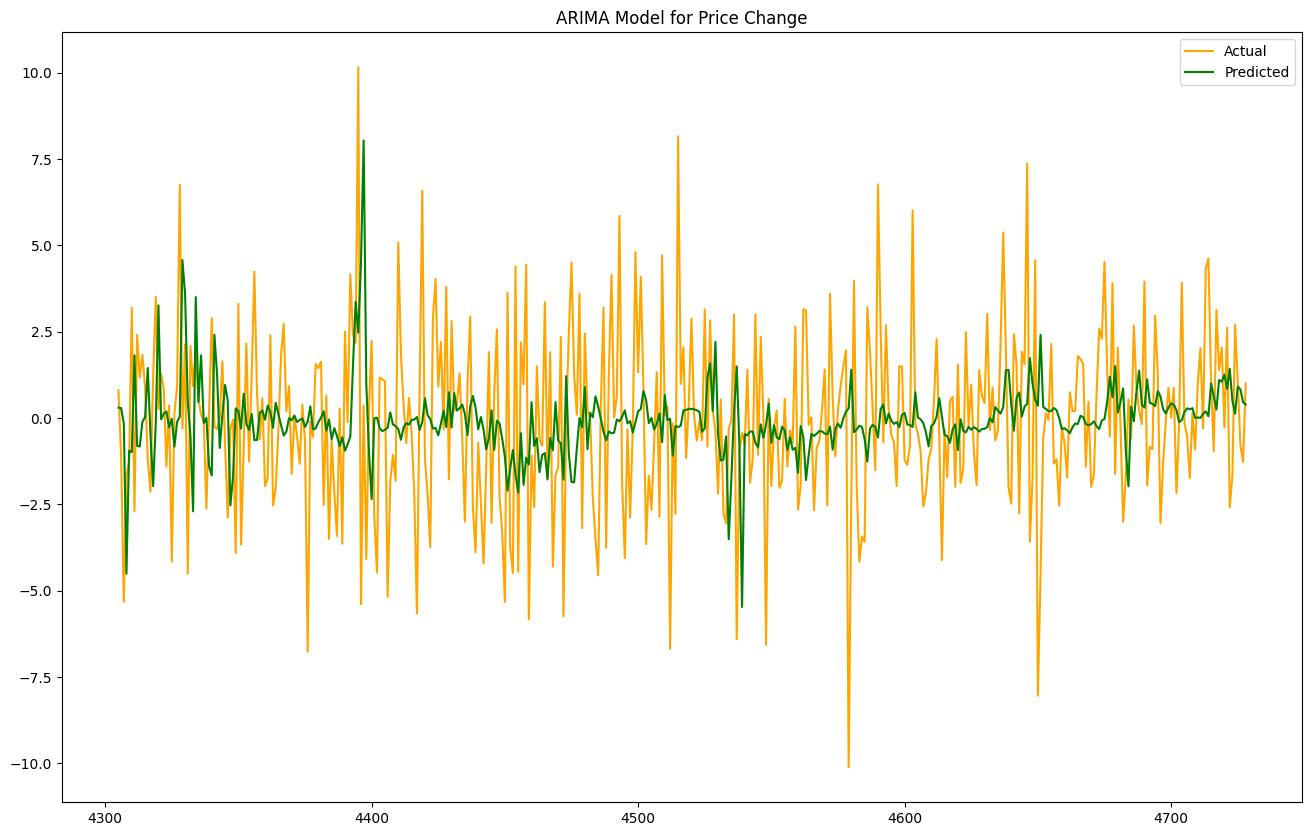

In [27]:
# Plot the prediction and real data
plt.figure(figsize= (16,10))
plt.title('ARIMA Model for Price Change')
plt.plot(test_change.index, test_change, color= 'orange', label= 'Actual')
plt.plot(test_change.index, pred_change, color= 'green', label= 'Predicted')
plt.legend()
plt.show()

In [28]:
# Compare test data and the prediction
change_data_test = pd.DataFrame({'Price Change (Test Data)': test_change, 'Price Change (Prediction on Test Data)': pred_change})
change_data_test

,Price Change (Test Data),Price Change (Prediction on Test Data)
4305,0.806488,0.304648
4306,-1.131989,0.290150
4307,-5.317001,-0.154334
4308,-1.663010,-4.502643
4309,-1.255493,-0.947069
...,...,...
4724,2.709999,0.127238
4725,1.080002,0.913831
4726,-0.790001,0.834164
4727,-1.269997,0.459707
